In [1]:
import pandas as pd
# pwd()

In [2]:
path = r'D:\jeju_bus_data_no_leakage\station'.replace('\\', '/')
file_name = path + '/station_제주연구원_20190531.csv'

In [3]:
df = pd.read_csv(file_name, 
                 usecols = ['STATION_ID', 'STATION_NM', 'CENTER_YN', 'LOCAL_X', 'LOCAL_Y', 'USE_YN', 'STATION_ADDR'],
                 encoding = 'ansi')

In [4]:
df = df.query("USE_YN == 'Y'")

In [13]:
addr_missing_df = df[df['STATION_ADDR'].isnull()][['STATION_ID', 'LOCAL_X', 'LOCAL_Y']]

In [31]:
#addr_missing_df.to_csv('station_addr_missing_df.csv', index=False)

In [16]:
addr_missing_df.loc[addr_missing_df.index]

,STATION_ID,LOCAL_X,LOCAL_Y
27,405000209,126.557353,33.458783
166,406000488,126.412267,33.261767
173,406000498,126.574907,33.288083
176,406000503,126.407669,33.249044
187,406000529,126.431520,33.251640
194,406000618,126.245698,33.272659
197,406000626,126.175656,33.277703
262,406000332,126.562080,33.246168
265,406000342,126.604500,33.241450
266,406000343,126.577867,33.247967


# 정류장 지도 위 시각화

In [7]:
import matplotlib.pyplot as plt

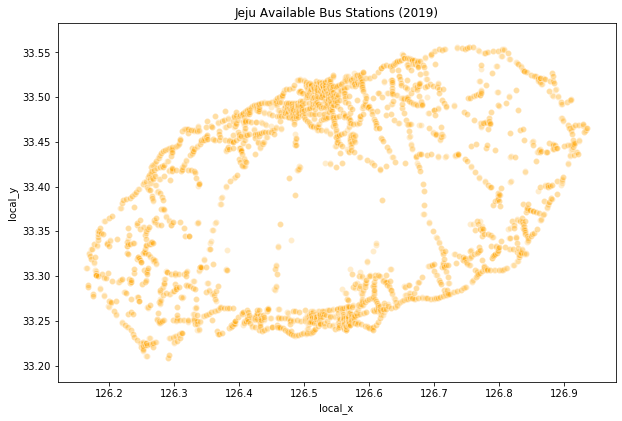

In [8]:
fig_title = 'Jeju Available Bus Stations (2019)'

plt.figure(figsize=(10, 6.6))
plt.scatter(x = df['LOCAL_X'], y = df['LOCAL_Y'], marker = 'o', 
            c = 'orange', alpha = '0.2', edgecolors = 'white')
plt.xlabel('local_x')
plt.ylabel('local_y')
plt.title(fig_title)
# plt.rcParams['figure.figsize']
# 6 : 4 = 10 : 6.6
plt.gcf().savefig(fig_title)
plt.show()

# K-means 정류장 군집화 -> K-nearst Neighbor

In [9]:
from sklearn.cluster import KMeans

df2 = df.copy()

init_n_clusters = int(len(df) / 4)
print('init_n_clusters', init_n_clusters)

flag = True
while True:
    kmeans = KMeans(n_clusters = init_n_clusters).fit(df[['LOCAL_X', 'LOCAL_Y']])    
    df2['cluster'] = kmeans.labels_
    
    temp = df2.groupby(by='cluster', as_index=False)[['STATION_ID']].count()
    if len(df2.loc[temp[temp.STATION_ID < 2].index]) < 10:
    #if not (df2.groupby(by=['cluster'])['cluster'].count() < 2).any(): -> 너무 강력한 조건
        print('n_clusters = {}로 K-means 군집화에 성공하였습니다.'.format(init_n_clusters))
        avg_pts = temp.query('STATION_ID > 2').mean()['STATION_ID'].round(1)
        print('각 클러스터의 평균 데이터포인트 개수는 {}입니다.'.format(avg_pts))
        
        flag = False
        break
    else:
        print('.', end='')
        init_n_clusters -= 1

if flag:
    print('K-means 군집화에 실패하였습니다.')

init_n_clusters 952
n_clusters = 952로 K-means 군집화에 성공하였습니다.
각 클러스터의 평균 데이터포인트 개수는 5.3입니다.


# 1-nearst Neighbor 
# -> node-node avg distance analysis

In [10]:
df2.loc[temp[temp.STATION_ID < 2].index]

,STATION_ID,STATION_NM,CENTER_YN,LOCAL_X,LOCAL_Y,USE_YN,STATION_ADDR,cluster
292,405000673,용강동대합실,N,126.586022,33.478365,Y,NaN,184
355,405000256,서회천,N,126.606883,33.498550,Y,NaN,363
365,405000318,제주중학교/제주향교,N,126.515700,33.510783,Y,제주시 용담1동,389
495,406000692,가시리,N,126.766867,33.361350,Y,서귀포시 표선면 가시리,242
662,405001170,대성목장,N,126.747534,33.430709,Y,제주시 구좌읍 송당리,330
863,405001259,월령리,N,126.217817,33.376150,Y,제주시 한림읍 월령리,186
877,405001295,하도리동동,N,126.884208,33.515931,Y,제주시 구좌읍 하도리,198


In [11]:
df2.to_csv('1-nearst.csv', encoding = 'cp949', index = False)

In [12]:
# 위도, 경도로 거리 구하기

import numbers
import math

class GeoUtil:
    """
    Geographical Utils
    실제 km를 알고 싶다면 haversine 를 이용하고
    그렇지 않고 더 빠른 속도로 단순 비교를 위한 용도라면 euclidean 를 이용할 수 있다.
    
    인용: https://blog.naver.com/wideeyed/221406744173
    """
    @staticmethod
    def degree2radius(degree):
        return degree * (math.pi/180)
    
    @staticmethod
    def get_harversion_distance(x1, y1, x2, y2, round_decimal_digits=5):
        """
        경위도 (x1,y1)과 (x2,y2) 점의 거리를 반환
        Harversion Formula 이용하여 2개의 경위도간 거래를 구함(단위:Km)
        """
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        R = 6371 # 지구의 반경(단위: km)
        dLon = GeoUtil.degree2radius(x2-x1)    
        dLat = GeoUtil.degree2radius(y2-y1)

        a = math.sin(dLat/2) * math.sin(dLat/2) \
            + (math.cos(GeoUtil.degree2radius(y1)) \
              *math.cos(GeoUtil.degree2radius(y2)) \
              *math.sin(dLon/2) * math.sin(dLon/2))
        b = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        return round(R * b, round_decimal_digits)

    @staticmethod
    def get_euclidean_distance(x1, y1, x2, y2, round_decimal_digits=5):        
        """
        유클리안 Formula 이용하여 (x1,y1)과 (x2,y2) 점의 거리를 반환
        """
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        dLon = abs(x2-x1) # 경도 차이
        if dLon >= 180:   # 반대편으로 갈 수 있는 경우
            dLon -= 360   # 반대편 각을 구한다
        dLat = y2-y1      # 위도 차이
        return round(math.sqrt(pow(dLon,2)+pow(dLat,2)),round_decimal_digits)

In [13]:
GeoUtil.get_euclidean_distance(126.97843, 37.56668, 127.02758, 37.49794)

0.0845

In [14]:
df.iloc[695]

STATION_ID        405001103
STATION_NM             원동입구
CENTER_YN                 N
LOCAL_X             126.336
LOCAL_Y              33.445
USE_YN                    Y
STATION_ADDR    제주시 애월읍 납읍리
Name: 598, dtype: object

# 각 정류장에 대하여 가장 인접한 정류장과의 거리를 구하는 프로그램

In [15]:
GeoUtil.get_harversion_distance(126.97843, 37.56668, 127.02758, 37.49794)

8.78676

In [16]:
local_X_list = list(df['LOCAL_X'])
local_Y_list = list(df['LOCAL_Y'])

In [17]:
local_list = [(local_X_list[i], local_Y_list[i]) for i in range(len(local_X_list))]

In [18]:
import sys

min_dist_list = []

for i in range(len(local_list)):
    minimum = sys.maxsize
    
    for j in range(len(local_list)):
        if i == j:
            continue
        
        dist = GeoUtil.get_harversion_distance(local_list[i][0], local_list[i][1],
                                               local_list[j][0], local_list[j][1])
        if minimum > dist:
            minimum = dist
    
    if dist == 0:
        print(i, j)
        
    min_dist_list.append(dist)

min_dist_list.sort()
min_dist_list = pd.Series(min_dist_list)

In [19]:
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47448 missing from c

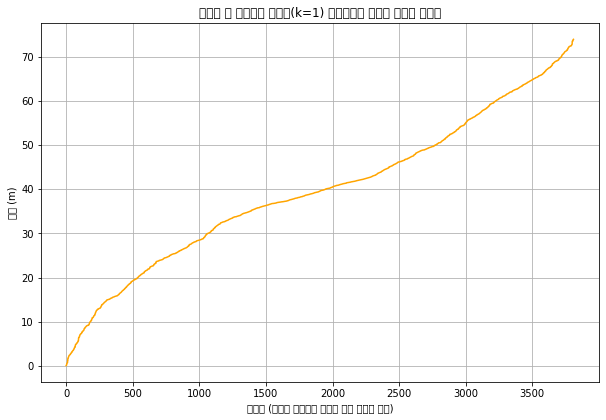

In [20]:
fig_title = '제주의 각 정류장의 최근접(k=1) 정류장과의 거리를 정렬한 그래프'

plt.figure(figsize=(10, 6.6))
# 6:4 = 10: 6.6 ... plt.rcParams['figure.figsize']
plt.grid()
plt.rc('font', family='Malgun Gothic')
plt.title(fig_title)
plt.xlabel('정류장 (최근접 정류장의 거리가 짧은 순으로 배치)')
plt.ylabel('거리 (m)')
plt.plot(min_dist_list, color = 'orange')
plt.gcf().savefig(fig_title)
plt.show()

In [21]:
# import matplotlib.font_manager as fm
# font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# font_list

In [22]:
min_dist_list.mean()

39.766424170603756

In [23]:
df.STATION_ADDR

3407             NaN
3880             NaN
3185             NaN
436      제주시 한경면 고산리
435              NaN
1221     제주시 한경면 고산리
4020             NaN
2614     제주시 한경면 용수리
4022             NaN
710      제주시 한경면 용수리
3749             NaN
3767             NaN
4026             NaN
3916             NaN
4024             NaN
2321    서귀포시 대정읍 신도리
2320    서귀포시 대정읍 신도리
197              NaN
1455             NaN
3423             NaN
3424             NaN
3300     제주시 한경면 용수리
3301     제주시 한경면 용수리
2616     제주시 한경면 용수리
867      제주시 한경면 용수리
3056     제주시 한경면 고산리
1701     제주시 한경면 고산리
1482    제주시 한경면 고산리 
915      제주시 한경면 고산리
868      제주시 한경면 고산리
            ...     
1628    서귀포시 성산읍 고성리
881     서귀포시 성산읍 고성리
3769             NaN
883     서귀포시 성산읍 고성리
882     서귀포시 성산읍 오조리
546     서귀포시 성산읍 고성리
689     서귀포시 성산읍 고성리
688     서귀포시 성산읍 고성리
2508    서귀포시 성산읍 고성리
1825    서귀포시 성산읍 오조리
3142    서귀포시 성산읍 오조리
2000    서귀포시 성산읍 고성리
2001    서귀포시 성산읍 고성리
1999    서귀포시 성산읍 고성리
1824    서귀포시 성산읍 오조리
2254    서귀포시 성산읍 고성리
636     서귀포시 

In [24]:
# https://blog.naver.com/seharhc/221325525128
# 위도/경도를 도로명주소로 바꾸기

# https://kin.naver.com/qna/detail.nhn?d1id=1&dirId=102020101&docId=260083984&qb=7JyE64+EIOqyveuPhOuhnCDso7zshowg7ZmV7J24&enc=utf8&section=kin&rank=2&search_sort=0&spq=0&pid=UTIsglp0JywssLmRYwhssssstis-276737&sid=Iy58PWTsqSRzH1q6HqcQ4g%3D%3D


# https://developers.kakao.com/docs/restapi/local#%EB%A1%9C%EC%BB%AC-%ED%82%A4%EC%9B%8C%EB%93%9C%EB%A1%9C-%EC%9E%A5%EC%86%8C-%EA%B2%80%EC%83%89

# http://kosis.kr/index/index.do